---
Authorship: Marie-anne

---

## DS4A Project - Team 18 - Vaccine Acceptance_EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import os


In [2]:
features = pd.read_csv(os.path.join(os.getcwd(), 'Data/training_set_features.csv'))
labels = pd.read_csv(os.path.join(os.getcwd(), 'Data/training_set_labels.csv'))
imp_feat = pd.read_csv(os.path.join(os.getcwd(), 'Data/imputed_train_hot_encoded.csv'))
imp_feat_not_hot = pd.read_csv(os.path.join(os.getcwd(), 'Data/imputed_train.csv'))

In [3]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


## Table of missing data

### Missing features data in train_set


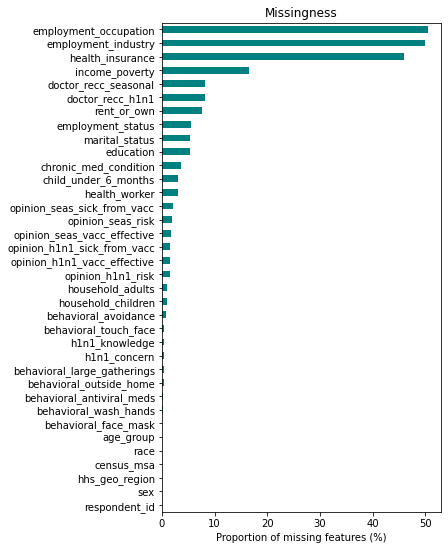

In [4]:
missing = features.isnull().sum()/len(features)*100
missing.sort_values().plot.barh(figsize=(5,9), color='teal', legend=False, title='Missingness')
plt.xlabel('Proportion of missing features (%)')
plt.savefig(os.path.join(os.getcwd(), 'Graphs/missing.png'), bbox_inches='tight')

## EDA

### Class imbalance in the 2 labels

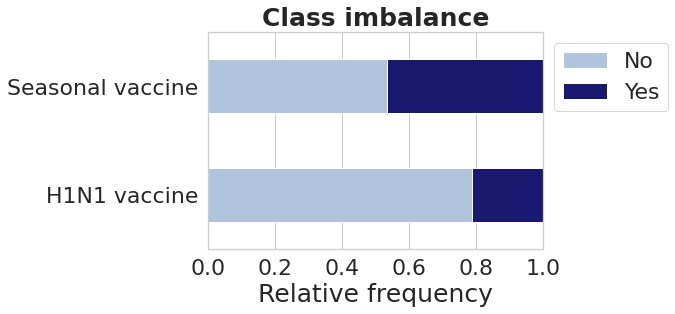

In [31]:
#Distribution of labels in train set
class_df = pd.DataFrame(labels.h1n1_vaccine.value_counts(normalize=True))
class_df['seasonal_vaccine'] = labels.seasonal_vaccine.value_counts(normalize=True)

sns.set(style='whitegrid', font_scale=2)
ax = class_df.transpose().plot(kind='barh', stacked=True, xlim=(0,1),
                          color=['lightsteelblue','midnightblue']
                         )
plt.yticks(ticks = ax.get_yticks(), labels =['H1N1 vaccine', 'Seasonal vaccine'])
plt.legend(labels = ['No', 'Yes'], bbox_to_anchor=(1, 1), frameon=True)
plt.title('Class imbalance', fontsize=25, fontweight='bold')
plt.xlabel('Relative frequency', fontsize=25)
plt.savefig(os.path.join(os.getcwd(), 'Graphs/class_imb.png'), bbox_inches='tight')

### Distribution of features in train with missing data

In [25]:
# Categorical df
df_cat = features.drop("respondent_id", axis=1).astype('category')

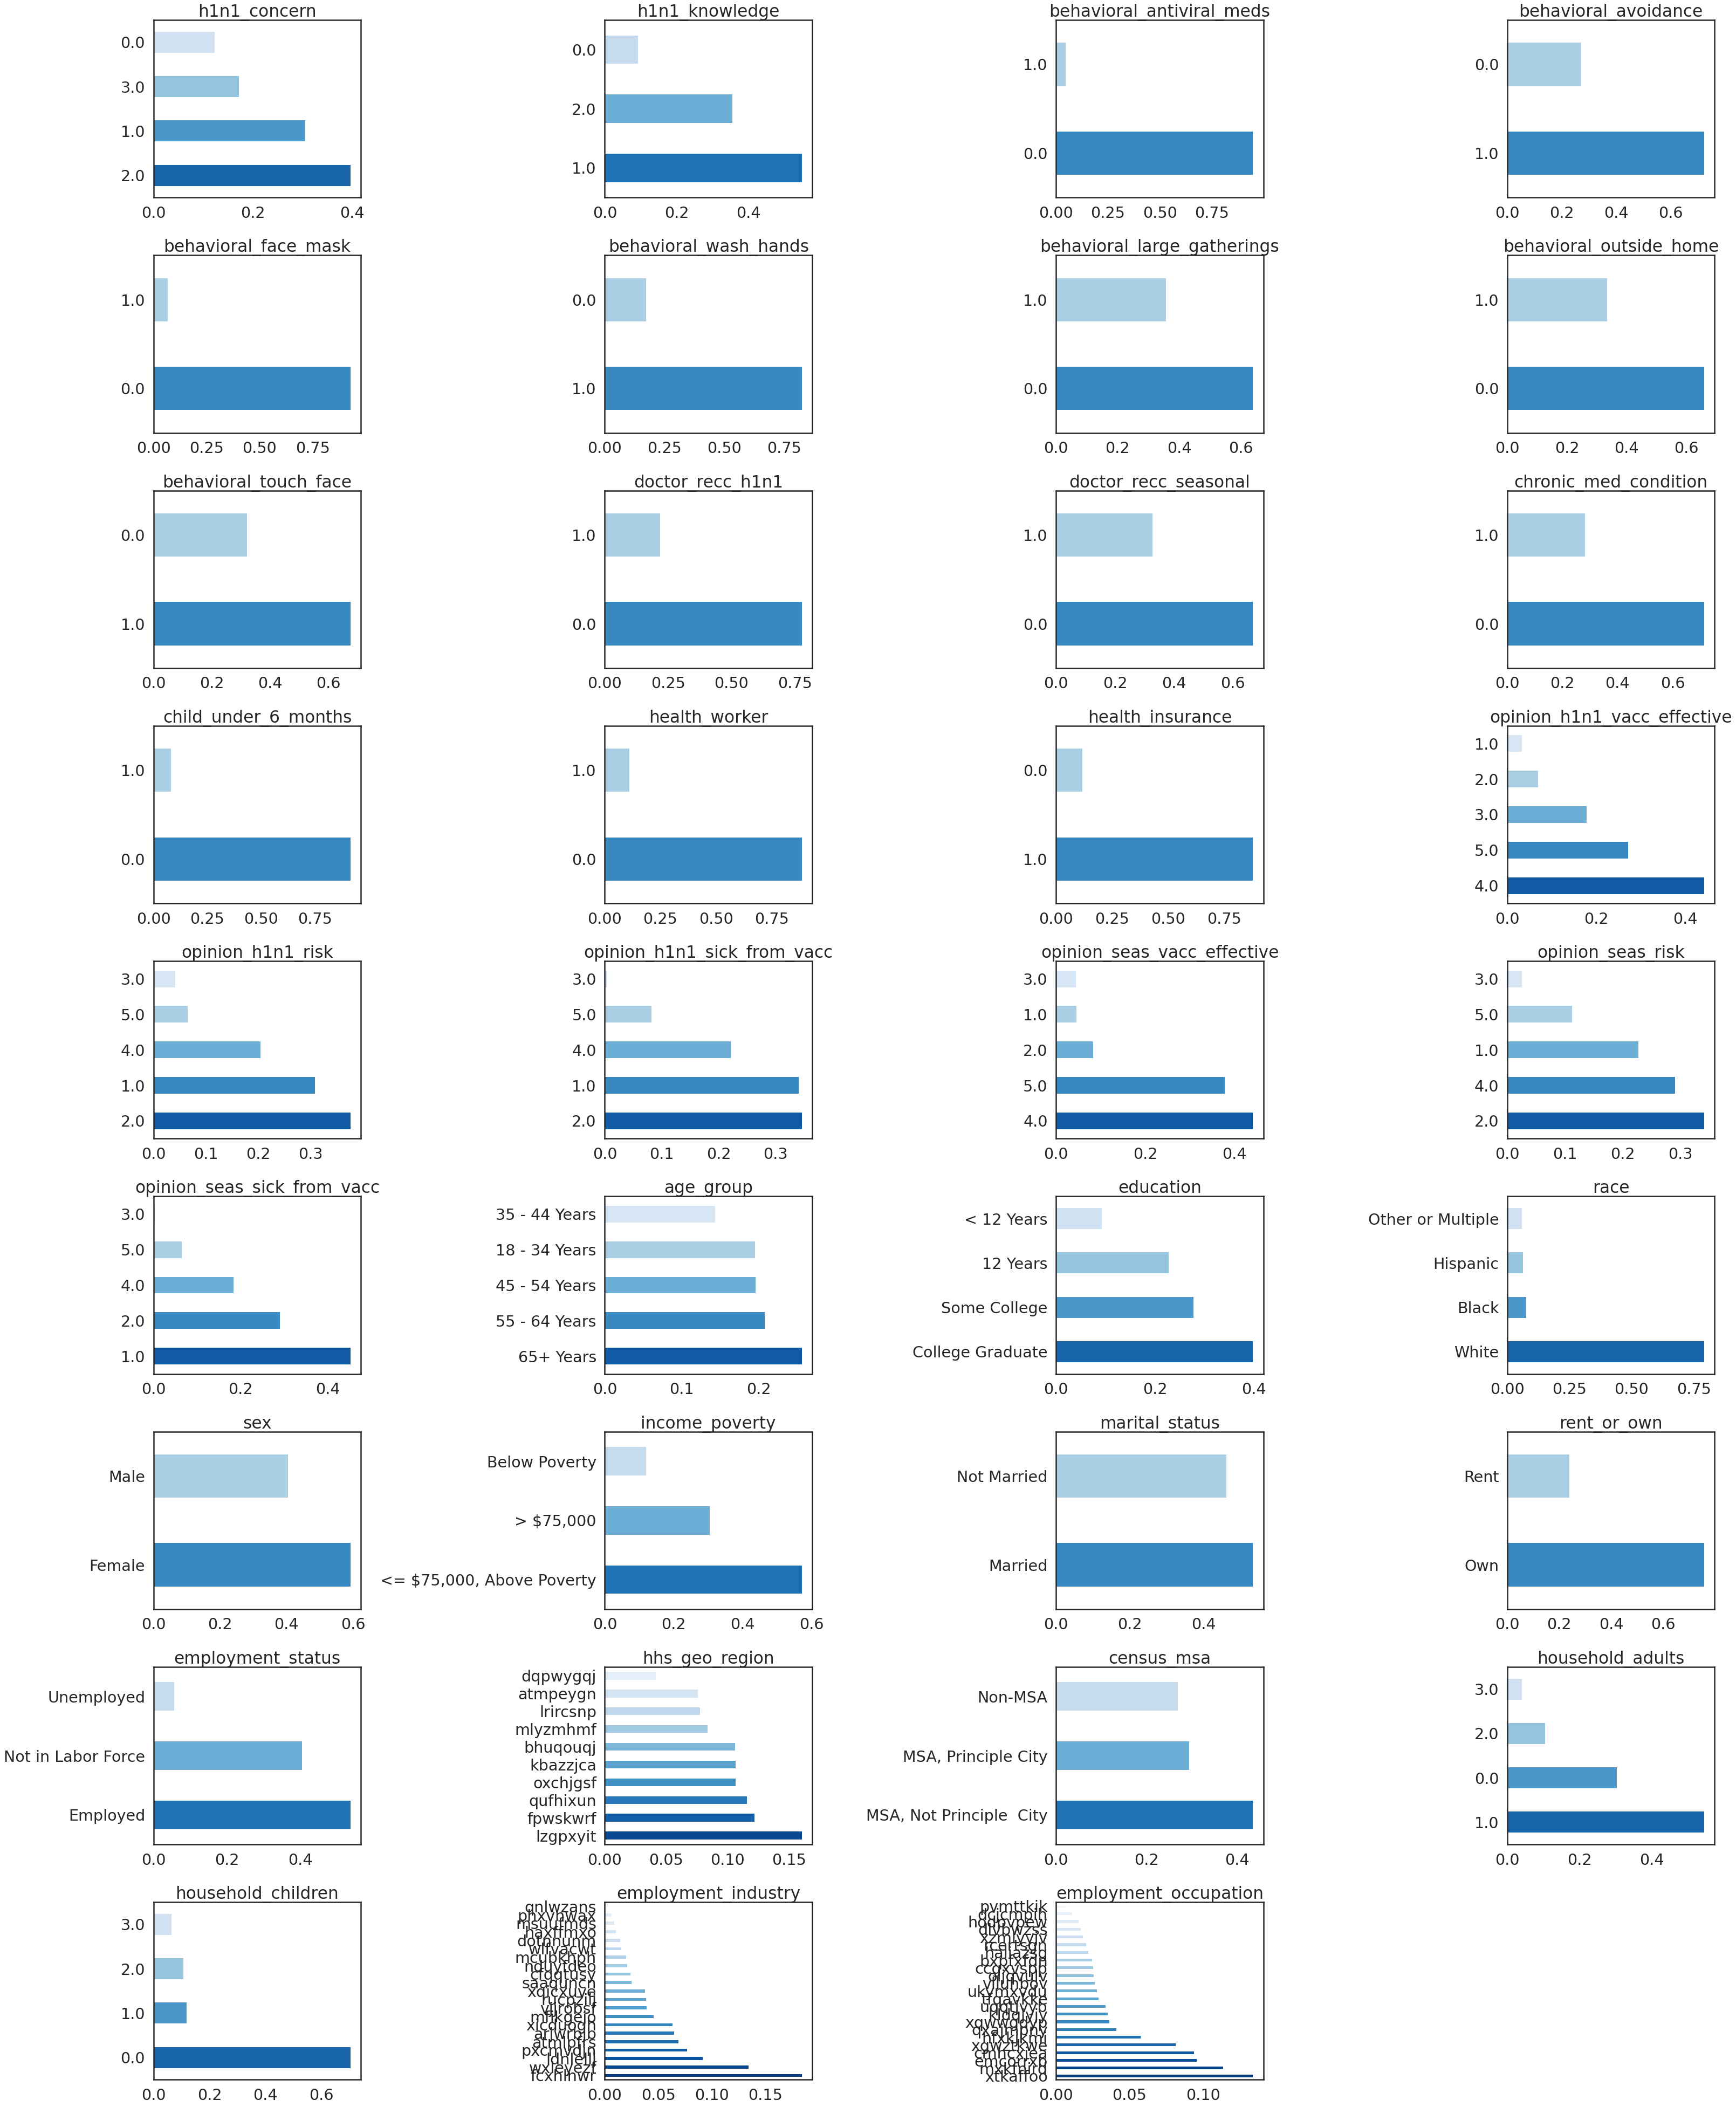

In [26]:
#Distribution of all features in train_set
fig, axes = plt.subplots(9, 4,  sharex=False, figsize=(45,55))
axes[8,3].set_visible(False)

sns.set(style='white', context='poster', font_scale=1.3)
for ax, col in zip(axes.flatten(), df_cat.columns):
    df_cat[col].value_counts(normalize=True).plot.barh(ax=ax,
                                                       title=col, color=sns.color_palette('Blues_r', len(df_cat[col].value_counts())),
                                                      )
    
fig.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'Graphs/distribution.png'), bbox_inches='tight')

### Distribution of features in **imputed** train 

In [27]:
# Categorical df
df_cat_imp = inp_feat_not_hot.drop('Unnamed: 0', axis=1).astype('category')

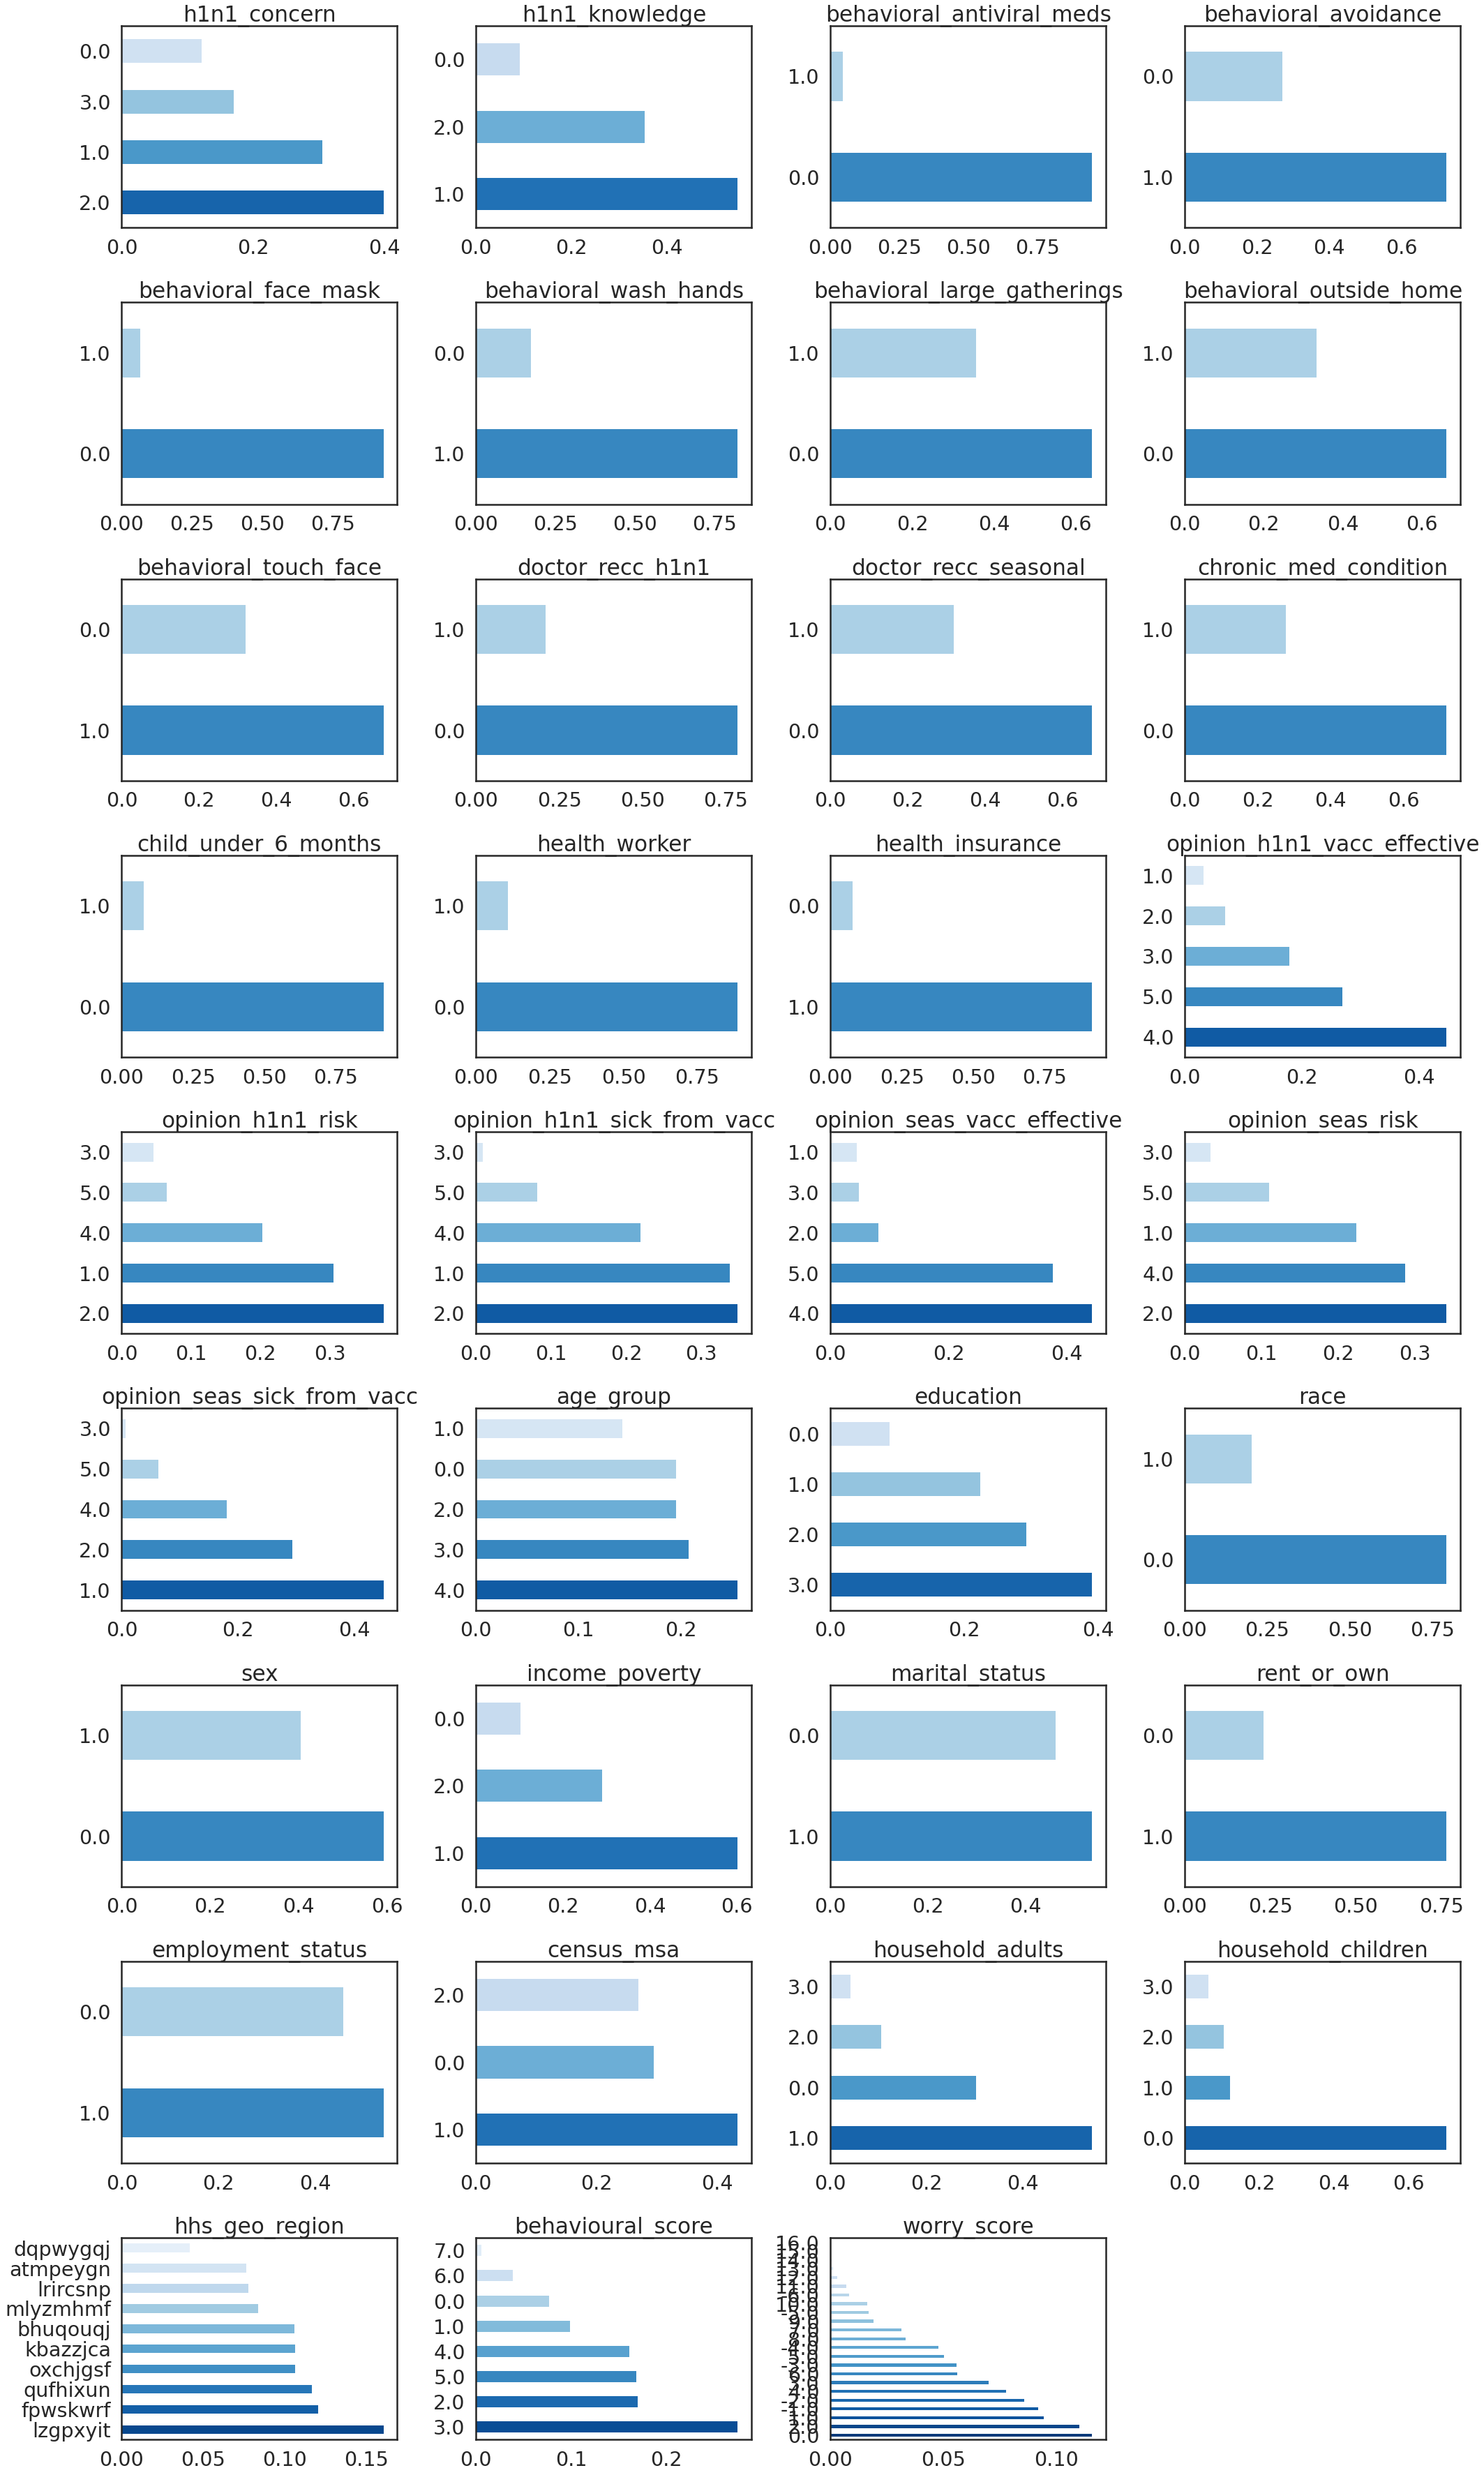

In [31]:
#Distribution of all features in train_set
fig, axes = plt.subplots(9, 4,  sharex=False, figsize=(30,50))
axes[8,3].set_visible(False)

sns.set(style='white', context='poster', font_scale=1.3)
for ax, col in zip(axes.flatten(), df_cat_imp.columns):
    df_cat_imp[col].value_counts(normalize=True).plot.barh(ax=ax,
                                                       title=col, color=sns.color_palette('Blues_r', len(df_cat_imp[col].value_counts())),
                                                      )
    
fig.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'Graphs/distribution_imp.png'), bbox_inches='tight')

### Correlation matrix of imputed data

In [ ]:
corr =imp_feat.drop('Unnamed: 0', axis=1).corr()

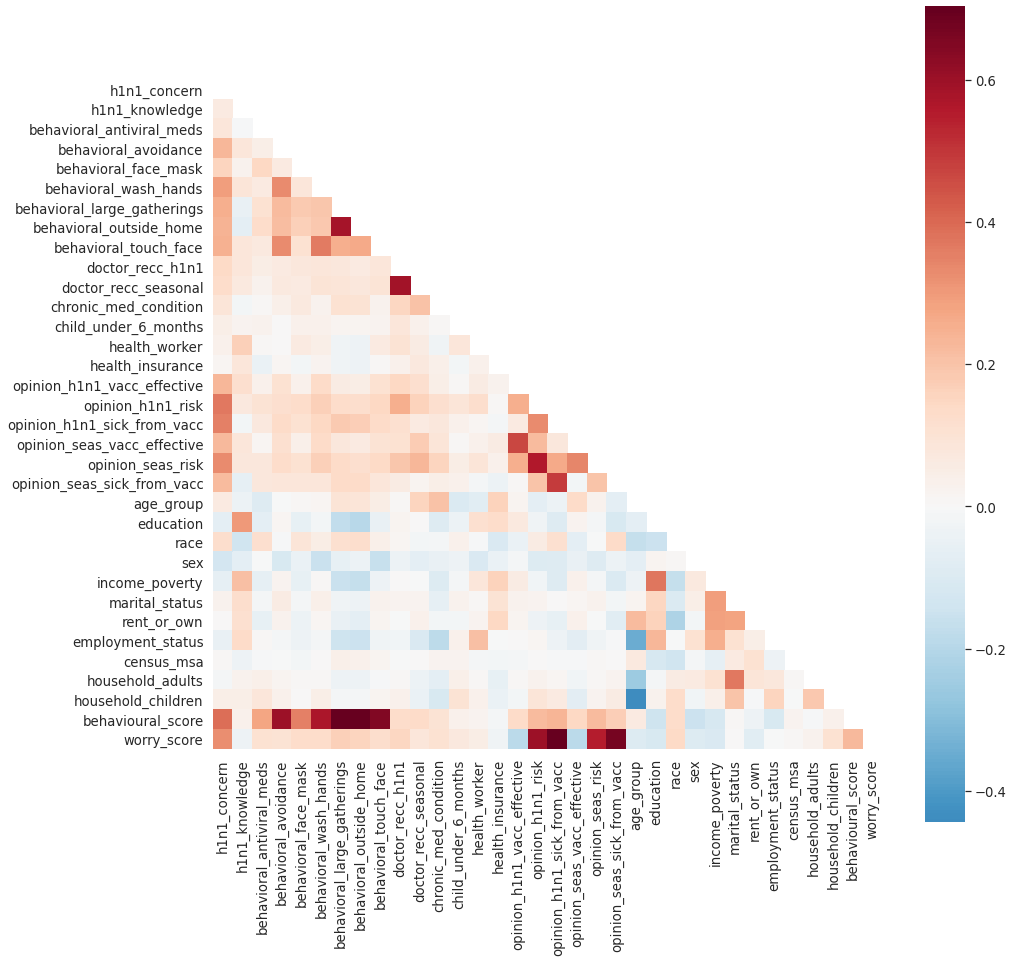

In [35]:
#Correlation matrix of all numerical features
corr =imp_feat.drop(['Unnamed: 0', 'atmpeygn',
       'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit',
       'mlyzmhmf', 'oxchjgsf', 'qufhixun'], axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.2)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='RdBu_r', center=0)

plt.savefig(os.path.join(os.getcwd(), 'Graphs/correlation_matrix.png'), bbox_inches='tight')

### Correlation after encoding variable as score

In [40]:
corr_2 =imp_feat.drop(['Unnamed: 0',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'atmpeygn',
       'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit',
       'mlyzmhmf', 'oxchjgsf', 'qufhixun'], axis=1).corr('spearman')


In [53]:
df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
df = imp_feat.copy()
df = df.drop(['Unnamed: 0',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'atmpeygn',
       'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca', 'lrircsnp', 'lzgpxyit',
       'mlyzmhmf', 'oxchjgsf', 'qufhixun'], axis=1)

for x in df.columns:
    for y in df.columns:
        corr = stats.spearmanr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]


In [54]:
df_p

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group,education,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,behavioural_score,worry_score
h1n1_concern,0.000000e+00,2.142485e-19,2.821428e-112,1.424084e-89,5.647058e-46,1.885572e-13,4.944046e-08,1.200614e-02,4.039436e-21,2.296530e-23,...,2.048106e-84,6.116368e-20,1.100567e-05,8.823857e-01,1.598649e-17,3.124247e-01,3.252850e-02,1.388767e-15,0.000000e+00,0.000000e+00
h1n1_knowledge,2.142485e-19,0.000000e+00,7.967797e-44,3.854651e-27,1.413739e-02,5.634775e-05,2.163444e-157,2.163982e-41,1.339007e-11,0.000000e+00,...,6.394267e-26,8.710846e-224,1.343181e-77,2.083582e-67,1.472764e-92,3.488443e-07,3.334776e-09,1.076243e-13,1.926047e-08,3.784391e-05
doctor_recc_h1n1,2.821428e-112,7.967797e-44,0.000000e+00,0.000000e+00,4.490895e-123,7.865193e-36,3.038552e-54,8.595156e-08,4.140353e-01,1.471164e-03,...,1.525110e-11,3.718813e-01,7.400954e-05,7.616012e-01,1.231511e-04,6.231303e-01,4.616292e-02,3.637693e-06,3.814204e-80,2.545954e-116
doctor_recc_seasonal,1.424084e-89,3.854651e-27,0.000000e+00,0.000000e+00,1.459477e-224,3.556330e-09,8.484184e-18,4.715815e-31,5.348317e-138,6.470928e-01,...,1.292982e-26,8.428153e-01,3.191675e-04,7.849206e-07,2.664902e-58,8.570898e-01,1.584648e-08,2.842844e-14,2.365508e-94,1.964814e-42
chronic_med_condition,5.647058e-46,1.413739e-02,4.490895e-123,1.459477e-224,0.000000e+00,4.337356e-01,2.650219e-05,1.593247e-10,2.173261e-231,4.883408e-42,...,3.463811e-16,5.784858e-51,2.305337e-20,4.889640e-04,3.389833e-174,4.988461e-05,3.780998e-30,3.225047e-73,1.001304e-54,5.915729e-53
child_under_6_months,1.885572e-13,5.634775e-05,7.865193e-36,3.556330e-09,4.337356e-01,0.000000e+00,5.499874e-36,1.882312e-03,5.365395e-53,1.403765e-10,...,5.276852e-08,2.831487e-02,1.685328e-05,9.990290e-04,3.135854e-08,4.640578e-04,4.018412e-11,8.487679e-52,9.657258e-09,8.966195e-28
health_worker,4.944046e-08,2.163444e-157,3.038552e-54,8.484184e-18,2.650219e-05,5.499874e-36,0.000000e+00,8.651507e-07,5.634893e-39,3.966020e-66,...,7.500847e-63,2.641299e-43,6.613258e-02,4.090366e-04,4.171412e-247,1.315285e-01,1.459745e-02,3.757753e-11,2.421902e-03,3.501588e-17
health_insurance,1.200614e-02,2.163982e-41,8.595156e-08,4.715815e-31,1.593247e-10,1.882312e-03,8.651507e-07,0.000000e+00,1.280859e-143,1.547984e-85,...,1.684236e-12,1.649798e-135,6.108532e-53,7.980653e-113,7.921532e-01,1.964390e-03,6.513889e-11,3.043268e-13,1.269944e-02,2.020645e-04
age_group,4.039436e-21,1.339007e-11,4.140353e-01,5.348317e-138,2.173261e-231,5.365395e-53,5.634893e-39,1.280859e-143,0.000000e+00,9.615886e-27,...,7.876967e-25,2.753114e-20,2.117950e-01,1.179910e-245,0.000000e+00,8.002115e-27,0.000000e+00,0.000000e+00,6.909663e-26,4.186861e-48
education,2.296530e-23,0.000000e+00,1.471164e-03,6.470928e-01,4.883408e-42,1.403765e-10,3.966020e-66,1.547984e-85,9.615886e-27,0.000000e+00,...,6.754723e-04,0.000000e+00,2.031111e-124,1.074819e-136,2.509324e-282,5.022523e-80,2.564822e-01,8.264606e-09,2.344695e-115,2.241749e-49


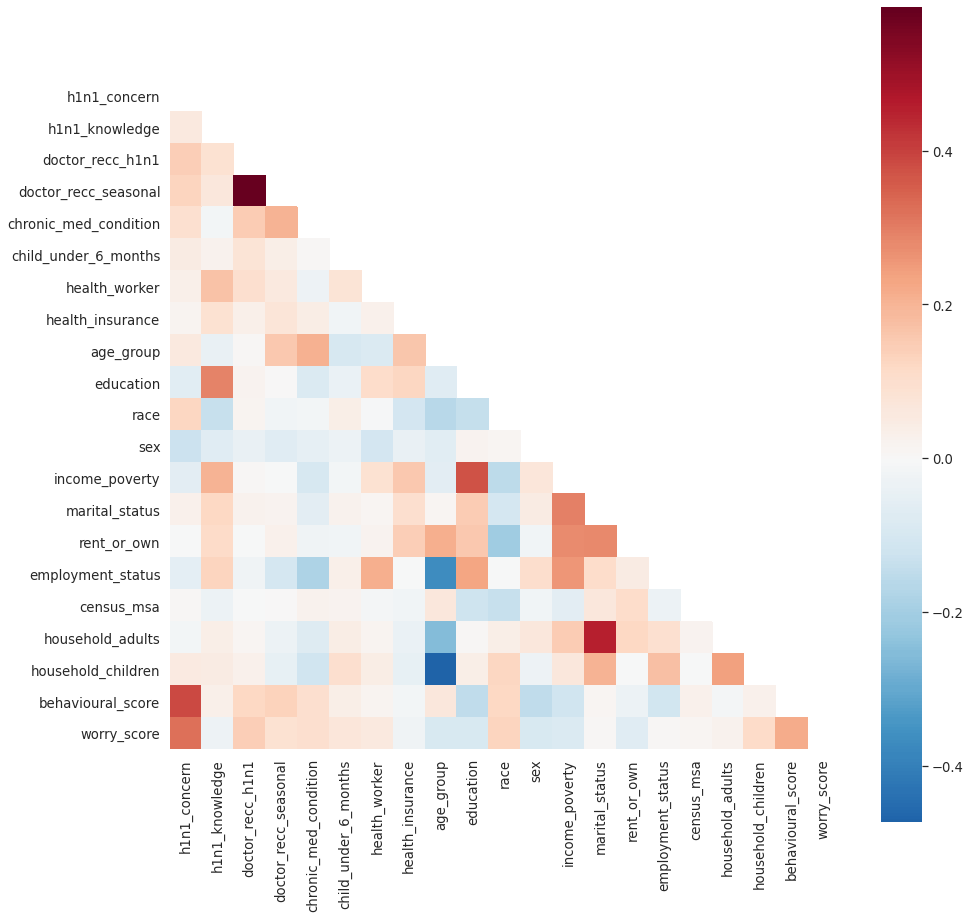

In [41]:
#Correlation matrix of all numerical features
mask_2 = np.zeros_like(corr_2)
mask_2[np.triu_indices_from(mask_2)] = True
sns.set(font_scale=1.2)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_2, mask=mask_2, square=True, cmap='RdBu_r', center=0)

plt.savefig(os.path.join(os.getcwd(), 'Graphs/correlation_matrix_2.png'), bbox_inches='tight')

## Simple linear regression

In [9]:
features.set_index('respondent_id', inplace=True)

In [10]:
merged_df = features.join(labels)
num_merged_df = merged_df.loc[:, merged_df.dtypes != 'object'].copy()
rel_h1n1 = num_merged_df.drop(['respondent_id', 'seasonal_vaccine'], axis=1)

In [ ]:
fig, axes = plt.subplots(5, 5,  sharey=True, figsize=(20,20))
axes[4,4].set_visible(False)
axes[4,3].set_visible(False)

for ax, col in zip(axes.flatten(), rel_h1n1.columns[:-1]):
    sns.regplot(data=rel_h1n1, y=rel_h1n1.columns[-1], x=col, ax=ax,
                x_estimator=np.mean #nicer plot for binary
                )
    ax.set_ylim(0,1)
    ax.set_xlim(rel_h1n1[col].min()-1, rel_h1n1[col].max()+1)

fig.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'Graphs/lin_reg_mean_estimator.png'), bbox_inches='tight')